### Crop all of the faces from the data set, resize, and split into Train/Test

In [1]:
from bs4 import BeautifulSoup

import glob
import shutil

import cv2

import random
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
xml_dir = r'.\Data\annotations\\'
pic_dir = r'.\Data\images\\'
extra_dir = r'.\Data\extra_faces\\'

In [3]:
xml_file_names = [f for f in glob.glob(xml_dir + '*')]
pic_file_names = [f for f in glob.glob(pic_dir + '*')]
extra_pics_names = [f for f in glob.glob(extra_dir + '*')]

In [4]:
img_count = 0

for xml, pic in zip(xml_file_names, pic_file_names):
    contents = open(xml, 'r').read()
    soup = BeautifulSoup(contents, 'xml')         
    labels = soup.find_all('name')
    x_mins, y_mins, x_maxs, y_maxs = soup.find_all('xmin'), soup.find_all('ymin'), soup.find_all('xmax'), soup.find_all('ymax')
    x_mins = [int(x.text) for x in x_mins]
    x_maxs = [int(x.text) for x in x_maxs]
    y_mins = [int(x.text) for x in y_mins]
    y_maxs = [int(x.text) for x in y_maxs]
    labels = [x.text for x in labels]
    
    current_pic = cv2.imread(pic)
    
    for x_min, y_min, x_max, y_max, label in zip(x_mins, y_mins, x_maxs, y_maxs, labels):
        if label != 'mask_weared_incorrect' and (x_max - x_min >= 20) and (y_max - y_min >= 20):
            cropped = current_pic[y_min:y_max,x_min:x_max]
            cropped = cv2.resize(cropped, (50, 50), interpolation = cv2.INTER_AREA)
            
            dirname = ''         
            if label == 'with_mask':
                dirname = './Data/cropped/with_mask/'
            else:   
                dirname = './Data/cropped/without_mask/'
                
            cv2.imwrite(dirname + str(img_count) + '.png', cropped)
            
            img_count += 1

In [5]:
wo_mask_dir = '.\Data\cropped\without_mask\\'
w_mask_dir = '.\Data\cropped\with_mask\\'

wo_mask_files = [f for f in glob.glob(wo_mask_dir + '*')]
w_mask_files = [f for f in glob.glob(w_mask_dir + '*')]

print(len(wo_mask_files))
print(len(w_mask_files))

317
1854


In [6]:
import random
random.shuffle(extra_pics_names)

In [7]:
extra_pics_needed = len(w_mask_files) - len(wo_mask_files)

for file,cnt in zip(extra_pics_names, range(extra_pics_needed)):
    image = cv2.imread(file)
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    cv2.imwrite('./Data/cropped/without_mask/' + str(img_count) + '.png', image)
    img_count +=1

In [8]:
wo_mask_dir = '.\Data\cropped\without_mask\\'
w_mask_dir = '.\Data\cropped\with_mask\\'

wo_mask_files = [f for f in glob.glob(wo_mask_dir + '*')]
w_mask_files = [f for f in glob.glob(w_mask_dir + '*')]

print(len(wo_mask_files))
print(len(w_mask_files))

1854
1854


In [9]:
cutoff = int(len(wo_mask_files) * .80)

random.shuffle(w_mask_files)
random.shuffle(wo_mask_files)

train_w_mask_files = w_mask_files[0:cutoff]
val_w_mask_files = w_mask_files[cutoff:]

train_wo_mask_files = wo_mask_files[0:cutoff]
val_wo_mask_files = wo_mask_files[cutoff:]

for f in train_w_mask_files:
    shutil.move(f, './Data/train/with_mask/')
    
for f in val_w_mask_files:
    shutil.move(f, './Data/val/with_mask/')
    
for f in train_wo_mask_files:
    shutil.move(f, './Data/train/without_mask/')
    
for f in val_wo_mask_files:
    shutil.move(f, './Data/val/without_mask/')

In [10]:
w_mask_dir = './Data/train/with_mask/'
wo_mask_dir = './Data/train/without_mask/'

wo_mask_pics = [f for f in glob.glob('./Data/train/without_mask/*')]
w_mask_pics = [f for f in glob.glob('./Data/train/with_mask/*')]

### Checking the results

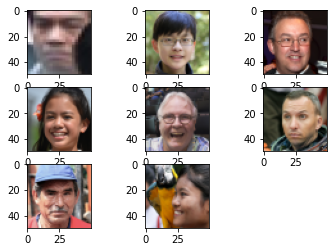

In [11]:
for i in range(331, 339):
    plt.subplot(i)
    random_num = np.random.randint(0,len(wo_mask_pics))
    img = cv2.imread(wo_mask_pics[random_num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)

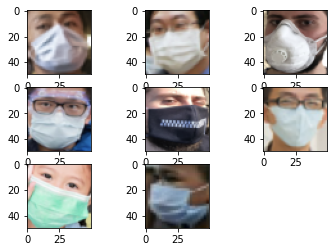

In [12]:
for i in range(331, 339):
    plt.subplot(i)
    random_num = np.random.randint(0,len(w_mask_pics))
    img = cv2.imread(w_mask_pics[random_num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)

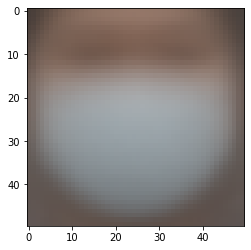

In [13]:
w_mask = np.array([np.array(load_img(f)) for f in w_mask_pics])
avg_mask = np.mean(w_mask, axis = 0)
avg_mask = avg_mask.reshape((50,50,3))
plt.imshow(avg_mask.astype('uint8'))

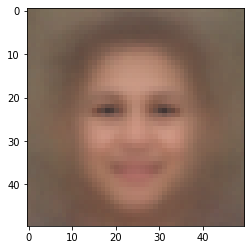

In [14]:
wo_mask = np.array([np.array(load_img(f)) for f in wo_mask_pics])
avg_wo_mask = np.median(wo_mask, axis = 0)
avg_wo_mask = avg_wo_mask.reshape((50,50,3))
plt.imshow(avg_wo_mask.astype('uint8'))